In [1]:
#libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pickle

In [2]:
#Reading data

df= pd.read_csv('gcdata.csv')
df.head()

,y,x1,x2,x3,x4
0,0,3861.22,3861.66,3860.75,3861.38
1,0,3861.19,3861.38,3860.16,3861.25
2,0,3861.38,3861.38,3858.47,3858.53
3,1,3858.72,3858.72,3857.03,3858.19
4,1,3858.09,3859.16,3858.03,3858.81


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       10000 non-null  int64  
 1   x1      10000 non-null  float64
 2   x2      10000 non-null  float64
 3   x3      10000 non-null  float64
 4   x4      10000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


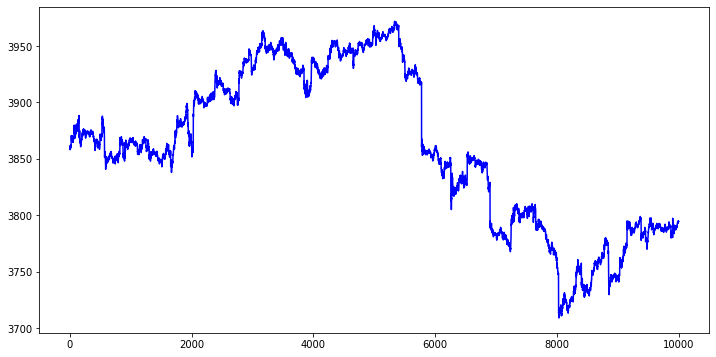

In [4]:
# Plotting Closing Price vs Time(Scaled)
plt.figure(figsize=(12,6))
plt.plot(df['x4'],color='blue')

In [5]:
X0 = df.drop(['y'],axis =1).values
y0 = df['y'].values

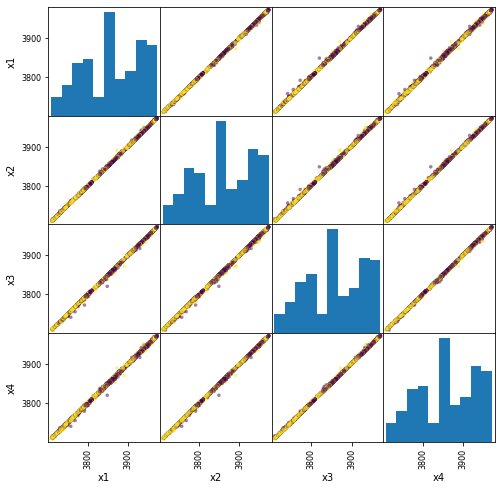

In [6]:
fg = pd.plotting.scatter_matrix(df.drop(['y'],axis=1),c = y0, figsize=[8, 8],s =50)  # plotting a scatter matrix to get an idea
                                                                                     # behind the relation between features.
                                                                                     # Since this market wasn't very volatile
                                                                                     # We can observe a linear relation between 
                                                                                     # the features which are OHLC prices.
    

In [7]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.73, random_state=20)      # Test train splitting

## Classification Models

### Logistic Regression

In [8]:
LR0 = LogisticRegression()
LR0.fit(X0_train,y0_train)


LogisticRegression()

In [9]:
y0_predictions_LR0 = LR0.predict(X0_test)

In [10]:
print(classification_report(y0_test,y0_predictions_LR0))

              precision    recall  f1-score   support

           0       0.56      0.24      0.34      3657
           1       0.52      0.81      0.63      3643

    accuracy                           0.53      7300
   macro avg       0.54      0.53      0.48      7300
weighted avg       0.54      0.53      0.48      7300



In [11]:
print ("Test Accuracy :",metrics.accuracy_score(y0_test, y0_predictions_LR0)) 
print("Train Accuracy :",LR0.score(X0_train,y0_train))

Test Accuracy : 0.5253424657534247
Train Accuracy : 0.5277777777777778


##### Varying Test-Train size

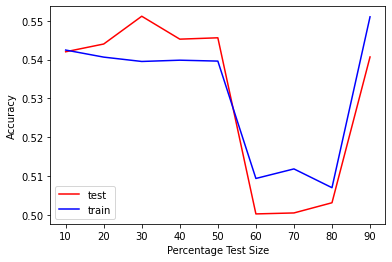

In [12]:
train_acc = []
test_acc = []
t = range(10,100,10)
for i in range(1,10):
    X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.1*i, random_state=20)  
    LR0 = LogisticRegression()
    LR0.fit(X0_train,y0_train)
    train_acc.append(LR0.score(X0_train,y0_train))
    test_acc.append(LR0.score(X0_test,y0_test))
plt.plot(t,test_acc,color='r',label='test')
plt.plot(t,train_acc,color='b',label='train')
plt.xlabel("Percentage Test Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Gaussian Naive Bayes Model

In [13]:
GNB0 = GaussianNB()
GNB0.fit(X0_train,y0_train)

GaussianNB()

In [14]:
y0_predictions_GNB0 = GNB0.predict(X0_test)

In [15]:
print ("Test Accuracy :",metrics.accuracy_score(y0_test, y0_predictions_GNB0)) 
print("Train Accuracy :",GNB0.score(X0_train,y0_train))

Test Accuracy : 0.49755555555555553
Train Accuracy : 0.52


In [16]:
print(classification_report(y0_test,y0_predictions_GNB0))

              precision    recall  f1-score   support

           0       0.49      0.38      0.43      4463
           1       0.50      0.61      0.55      4537

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.49      9000
weighted avg       0.50      0.50      0.49      9000



###### Varying test-train size

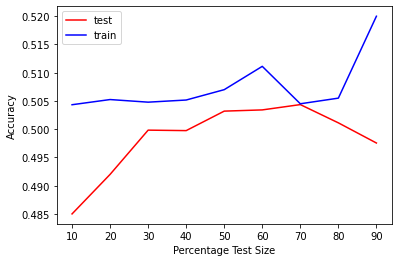

In [17]:
train_acc = []
test_acc = []
t = range(10,100,10)
for i in range(1,10):
    X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.1*i, random_state=20)  
    GNB0 = GaussianNB()
    GNB0.fit(X0_train,y0_train)
    train_acc.append(GNB0.score(X0_train,y0_train))
    test_acc.append(GNB0.score(X0_test,y0_test))
plt.plot(t,test_acc,color='r',label='test')
plt.plot(t,train_acc,color='b',label='train')
plt.xlabel("Percentage Test Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### KNN Classifier 

In [18]:
KNN0 = KNeighborsClassifier(n_neighbors=8)
KNN0.fit(X0_train,y0_train)

KNeighborsClassifier(n_neighbors=8)

In [19]:
y0_predictions_KNN0 = KNN0.predict(X0_test)

In [20]:
print ("Test Accuracy :",metrics.accuracy_score(y0_test, y0_predictions_KNN0)) 
print("Train Accuracy :",KNN0.score(X0_train,y0_train))

Test Accuracy : 0.5005555555555555
Train Accuracy : 0.648


In [21]:
print(classification_report(y0_test,y0_predictions_KNN0))

              precision    recall  f1-score   support

           0       0.50      0.62      0.55      4463
           1       0.51      0.39      0.44      4537

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.49      9000
weighted avg       0.50      0.50      0.49      9000



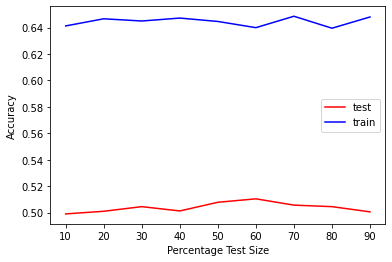

In [22]:
train_acc = []
test_acc = []
t = range(10,100,10)
for i in range(1,10):
    X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.1*i, random_state=20)  
    KNN0 = KNeighborsClassifier(n_neighbors=8)
    KNN0.fit(X0_train,y0_train)
    train_acc.append(KNN0.score(X0_train,y0_train))
    test_acc.append(KNN0.score(X0_test,y0_test))
plt.plot(t,test_acc,color='r',label='test')
plt.plot(t,train_acc,color='b',label='train')
plt.xlabel("Percentage Test Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Support Vector Machine

In [23]:
SVM0 = SVC()                        # Creating a Support Vector Classifer Instance
SVM0.fit(X0_train,y0_train)         # Training Classifier Model

SVC()

In [24]:
y0_predictions_SVC0 = SVM0.predict(X0_test)
print ("Test Accuracy :",metrics.accuracy_score(y0_test, y0_predictions_SVC0)) 
print("Train Accuracy :",SVM0.score(X0_train,y0_train))

Test Accuracy : 0.4968888888888889
Train Accuracy : 0.532


In [25]:
print(classification_report(y0_test,y0_predictions_SVC0))

              precision    recall  f1-score   support

           0       0.49      0.33      0.39      4463
           1       0.50      0.66      0.57      4537

    accuracy                           0.50      9000
   macro avg       0.49      0.50      0.48      9000
weighted avg       0.50      0.50      0.48      9000



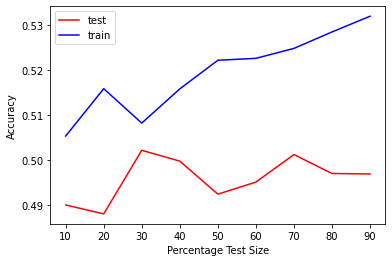

In [26]:
train_acc = []
test_acc = []
t = range(10,100,10)
for i in range(1,10):
    X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.1*i, random_state=20)  
    SVC0 = SVC()
    SVC0.fit(X0_train,y0_train)
    train_acc.append(SVC0.score(X0_train,y0_train))
    test_acc.append(SVC0.score(X0_test,y0_test))
plt.plot(t,test_acc,color='r',label='test')
plt.plot(t,train_acc,color='b',label='train')
plt.xlabel("Percentage Test Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Decision Tree

In [27]:
DT0 = DecisionTreeClassifier()
DT0.fit(X0_train,y0_train)

DecisionTreeClassifier()

In [28]:
y0_predictions_DT0 = DT0.predict(X0_test)

In [29]:
print(metrics.accuracy_score(y0_test,y0_predictions_DT0))

0.5011111111111111


In [30]:
print(classification_report(y0_test,y0_predictions_DT0))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4463
           1       0.51      0.50      0.50      4537

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000



###### Varying test-train size

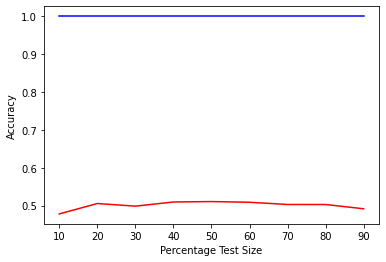

In [31]:
train_acc = []
test_acc = []
t = range(10,100,10)
for i in range(1,10):
    X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.1*i, random_state=20)  
    DT0 = DecisionTreeClassifier()
    DT0.fit(X0_train,y0_train)
    train_acc.append(DT0.score(X0_train,y0_train))
    test_acc.append(DT0.score(X0_test,y0_test))
plt.plot(t,test_acc,color='r',label='test')
plt.plot(t,train_acc,color='b',label='train')
plt.xlabel("Percentage Test Size")
plt.ylabel("Accuracy")
plt.show()

# Feature Training

## Calculating One Day Returns
<font color='green'>Definition: ODR is the price of stocks at today's closure compared to the price of the same stock at yesterday's closure.</font>

In [32]:
df['ODR'] = df.x4.pct_change()

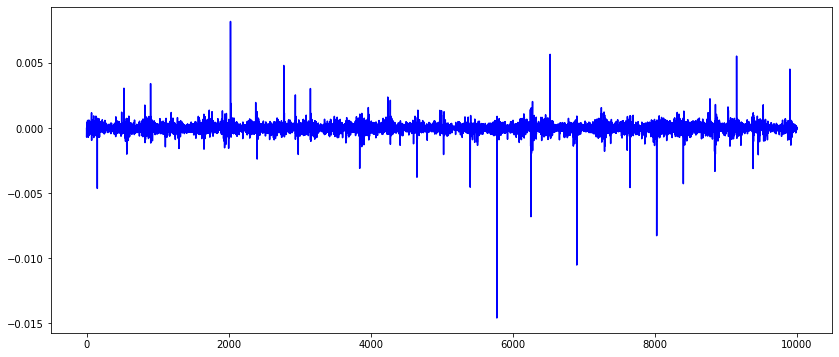

In [33]:
# Plotting ODR
plt.figure(figsize=(14,6))
plt.plot(df['ODR'],color='blue')

### Momentum Calculation

In [34]:
def mv(dataframe):
    n = len(dataframe)
    arr = []
    for i in range(0,5):
        arr.append(None)
    for j in range(5,n):
        mv = dataframe.x4[j] - dataframe.x4[j-5]           #Equation for momentum
        arr.append(mv)
    return arr

mv = mv(df)

# add momentum to dataframe
df['Momentum'] = mv

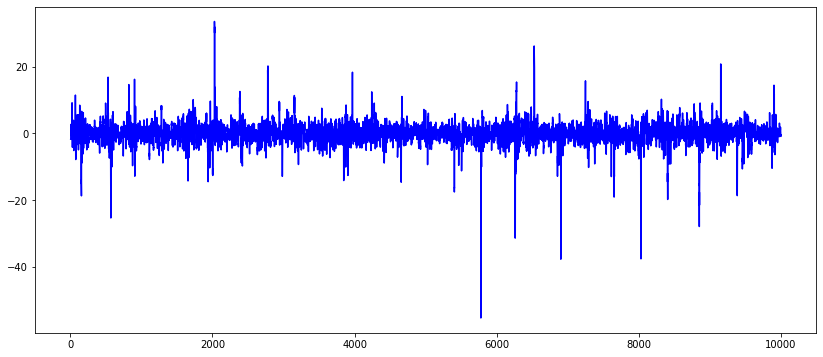

In [35]:
# Plotting ODR
plt.figure(figsize=(14,6))
plt.plot(df['Momentum'],color='blue')

## Return of Investment

<font color='green'>Definition: Return on investment (ROI) is a performance measure used to evaluate the efficiency or profitability of an investment or compare the efficiency of a number of different investments. ROI tries to directly measure the amount of return on a particular investment, relative to the investment's cost.</font>

<font color='blue'>Formula: ROI is calculated by subtracting the initial value of the investment from the final value of the investment (which equals the net return), then dividing this new number (the net return) by the cost of the investment, then finally, multiplying it by 100.</font>



In [36]:
def ROI(dataframe,n):
    l = len(dataframe)
    arr = []
    for i in range(0,n):
        arr.append(None)
    for j in range(n,l):
        roi= float((dataframe.x4[j] - dataframe.x4[j-n])/dataframe.x4[j-n]) #Equation for ROI
        arr.append(roi)
    return arr

#calculating ROI for 10, 20 and 30 day periods

ROI10=ROI(df,10)
ROI20=ROI(df,20)
ROI30=ROI(df,30)


#adding all the above data to our core dataframe
df['10 Days ROI']=ROI10
df['20 Days ROI']=ROI20
df['30 Days ROI']=ROI30

df

,y,x1,x2,x3,x4,ODR,Momentum,10 Days ROI,20 Days ROI,30 Days ROI
0,0,3861.22,3861.66,3860.75,3861.38,NaN,NaN,NaN,NaN,NaN
1,0,3861.19,3861.38,3860.16,3861.25,-0.000034,NaN,NaN,NaN,NaN
2,0,3861.38,3861.38,3858.47,3858.53,-0.000704,NaN,NaN,NaN,NaN
3,1,3858.72,3858.72,3857.03,3858.19,-0.000088,NaN,NaN,NaN,NaN
4,1,3858.09,3859.16,3858.03,3858.81,0.000161,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9995,0,3794.75,3795.00,3793.75,3794.88,-0.000016,0.75,0.000511,0.001089,0.001330
9996,1,3794.78,3795.09,3794.53,3794.72,-0.000042,0.25,0.000322,0.000833,0.001277
9997,0,3794.75,3795.09,3794.47,3794.91,0.000050,0.25,0.000388,0.000717,0.001502
9998,1,3794.94,3795.13,3793.38,3794.34,-0.000150,-0.91,0.000245,0.000435,0.001129


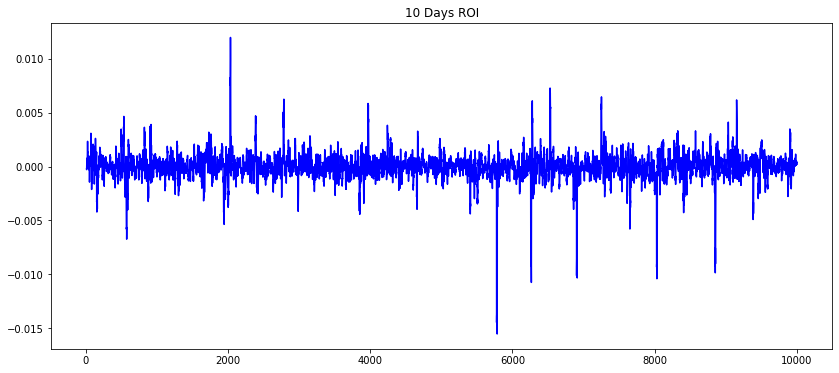

In [37]:
# Plotting 10 Days ROI
plt.figure(figsize=(14,6))
plt.plot(df['10 Days ROI'],color='blue')
plt.title('10 Days ROI')
plt.show()

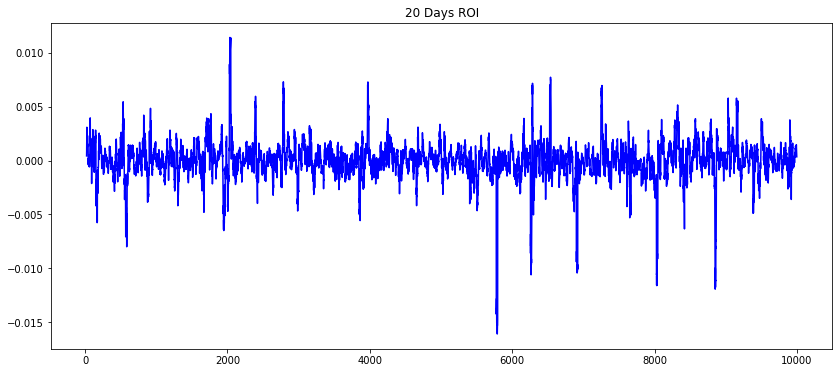

In [38]:
# Plotting 20 Days ROI
plt.figure(figsize=(14,6))
plt.plot(df['20 Days ROI'],color='blue')
plt.title('20 Days ROI')
plt.show()

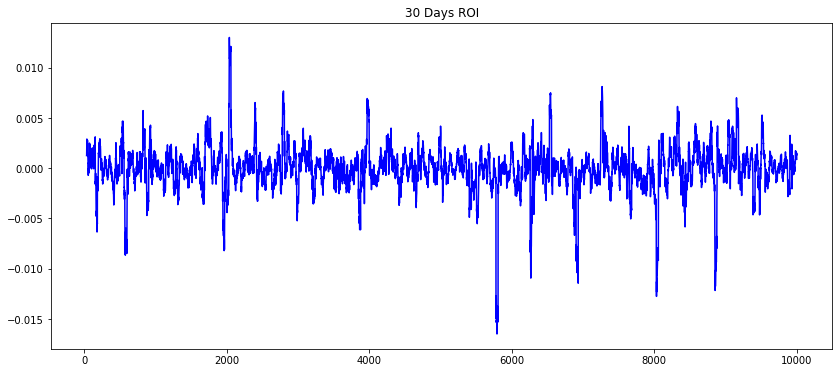

In [39]:
# Plotting 30 Days ROI
plt.figure(figsize=(14,6))
plt.plot(df['30 Days ROI'],color='blue')
plt.title('30 Days ROI')
plt.show()

## Relative strength index
<font color='green'>Definition: The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.</font>

<font color='blue'>Formula for Calculating RSI: RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ].</font>

In [40]:
def RSI(dataframe,period):
    # calculating the average of upwards of last 14 days: Ct - Ct-1
    #calculating the average of downwards of last 14 days: Ct-1 - Ct
    n = len(dataframe)
    arr = []
    for i in range(0,period):
        arr.append(None)
    for j in range(period,n):
        total_upwards = 0
        total_downwards = 0
        # this will find average of upwards
        for k in range(j,j-period,-1):
            if(dataframe.x4[k-1] > dataframe.x4[k]):
                total_downwards = total_downwards + (dataframe.x4[k-1] - dataframe.x4[k])    
        avg_down = total_downwards / period
        for l in range(j,j-period,-1):
            if(dataframe.x4[l] > dataframe.x4[l-1]):
                total_upwards = total_upwards + (dataframe.x4[l] - dataframe.x4[l-1])
        avg_up = total_upwards / period
        RS = avg_up / avg_down
        RSI  = 100 - (100/(1+RS))
        arr.append(RSI)
    return arr


#calculating relative strength index for 10, 14, and 30 days periods

RSI_14 = RSI(df,14)
RSI_10 = RSI(df,10)
RSI_30 = RSI(df,30)

#adding the above RSI data to the core dataframe

df['10_day_RSI'] = RSI_10
df['14_day_RSI'] = RSI_14
df['30_day_RSI'] = RSI_30


C:\Users\Dell\AppData\Local\Temp/ipykernel_3816/3839667914.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  RS = avg_up / avg_down


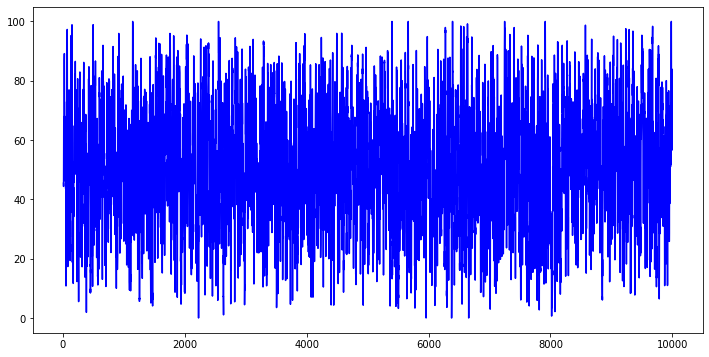

In [41]:
# Plotting 10 Days Rsi
plt.figure(figsize=(12,6))
plt.plot(df['10_day_RSI'],color='blue')

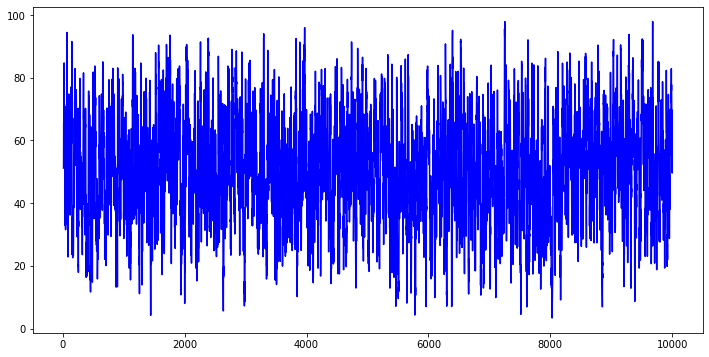

In [42]:
# Plotting 14 Days RSI
plt.figure(figsize=(12,6))
plt.plot(df['14_day_RSI'],color='blue')

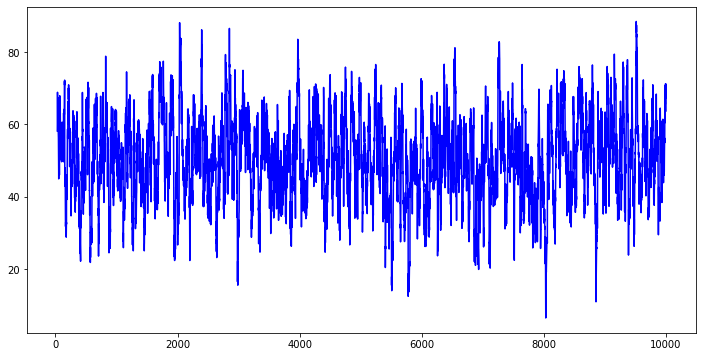

In [43]:
# Plotting 30 Days RSI
plt.figure(figsize=(12,6))
plt.plot(df['30_day_RSI'],color='blue')

## Exponential Moving Average

<font color='green'>Definition: The exponential moving average (EMA) is a technical chart indicator that tracks the price of an investment (like a stock or commodity) over time. The EMA is a type of weighted moving average (WMA) that gives more weighting or importance to recent price data.</font>

<font color='blue'>Formula for Calculating EMA: EMA = EMA = Price(t)×k+EMA(y)×(1−k). 
where:
t = today;
y = yesterday;
N = number of days in EMA;
k = 2÷(N+1).
</font>



In [44]:
def EMA(dataframe, n):
    m = len(dataframe)
    arr = []
    arr.append(None)
    prevEMA = dataframe.x4[0]
    for i in range(1,m):
        close = dataframe.x4[i]
        EMA = ((2/(n+1))*close) + ((1-(2/(n+1)))*prevEMA)
        arr.append(EMA)
        prevEMA = EMA
    return arr

#Calculating EMA keeping n=12 and n=26

EMA_12 = EMA(df, 12)
EMA_26 = EMA(df, 26)

#adding EMA data to the core dataframe 

df['EMA_12'] = EMA_12
df['EMA_26'] = EMA_26
df

,y,x1,x2,x3,x4,ODR,Momentum,10 Days ROI,20 Days ROI,30 Days ROI,10_day_RSI,14_day_RSI,30_day_RSI,EMA_12,EMA_26
0,0,3861.22,3861.66,3860.75,3861.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,3861.19,3861.38,3860.16,3861.25,-0.000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861.360000,3861.370370
2,0,3861.38,3861.38,3858.47,3858.53,-0.000704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3860.924615,3861.159973
3,1,3858.72,3858.72,3857.03,3858.19,-0.000088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3860.503905,3860.939975
4,1,3858.09,3859.16,3858.03,3858.81,0.000161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3860.243305,3860.782199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,3794.75,3795.00,3793.75,3794.88,-0.000016,0.75,0.000511,0.001089,0.001330,83.916084,64.419476,68.208092,3794.176654,3793.072296
9996,1,3794.78,3795.09,3794.53,3794.72,-0.000042,0.25,0.000322,0.000833,0.001277,74.796748,60.231660,67.335244,3794.260246,3793.194348
9997,0,3794.75,3795.09,3794.47,3794.91,0.000050,0.25,0.000388,0.000717,0.001502,78.378378,58.800000,71.089696,3794.360208,3793.321433
9998,1,3794.94,3795.13,3793.38,3794.34,-0.000150,-0.91,0.000245,0.000435,0.001129,64.856230,49.616858,66.187595,3794.357099,3793.396883


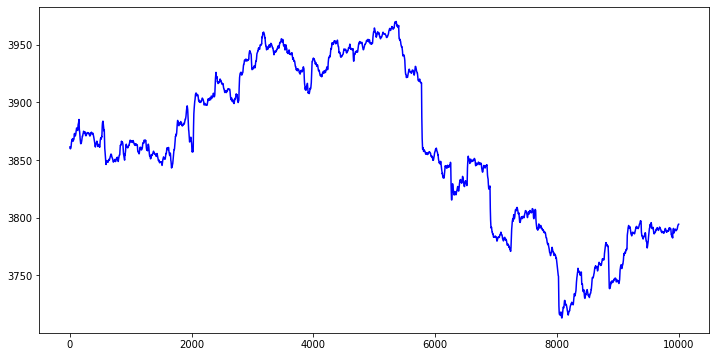

In [45]:
# Plotting Exponential Moving Average 10 days
plt.figure(figsize=(12,6))
plt.plot(df['EMA_12'],color='blue')

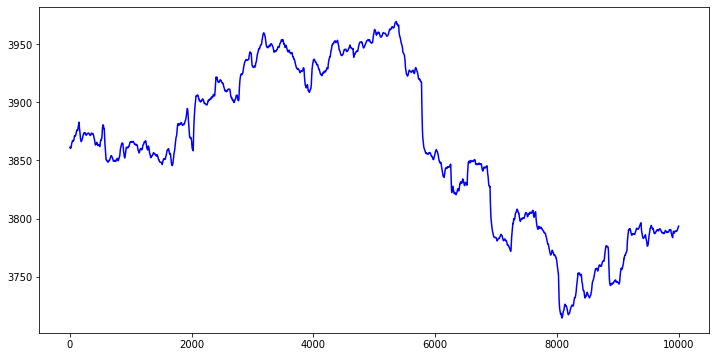

In [46]:
# Plotting Exponential Moving Average 26 days
plt.figure(figsize=(12,6))
plt.plot(df['EMA_26'],color='blue')

## Moving Average Convergence/Divergence

<font color='green'>Definition: It is a trading indicator used in technical analysis of stock prices, created by Gerald Appel in the late 1970s. It is designed to reveal changes in the strength, direction, momentum, and duration of a trend in a stock's price.</font>

<font color='blue'>Formula for Calculating MACD: Moving Average of EMA(n) - EMA(m2) for each row</font>

In [47]:
# where n = 12 and m2 = 26
def MACD(dataframe):
    n = 12
    m2 = 26
    arr = []
    arr.append(None)
    ema_12 = EMA(dataframe,n)
    ema_26 = EMA(dataframe,m2)
    m = len(dataframe)
    for i in range(1,m):
        arr.append(ema_12[i] - ema_26[i])
    return arr

MACD = MACD(df)

#Add MACD to our dataframe 
df['MACD_12_26'] = MACD
df

,y,x1,x2,x3,x4,ODR,Momentum,10 Days ROI,20 Days ROI,30 Days ROI,10_day_RSI,14_day_RSI,30_day_RSI,EMA_12,EMA_26,MACD_12_26
0,0,3861.22,3861.66,3860.75,3861.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,3861.19,3861.38,3860.16,3861.25,-0.000034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861.360000,3861.370370,-0.010370
2,0,3861.38,3861.38,3858.47,3858.53,-0.000704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3860.924615,3861.159973,-0.235357
3,1,3858.72,3858.72,3857.03,3858.19,-0.000088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3860.503905,3860.939975,-0.436069
4,1,3858.09,3859.16,3858.03,3858.81,0.000161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3860.243305,3860.782199,-0.538894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,3794.75,3795.00,3793.75,3794.88,-0.000016,0.75,0.000511,0.001089,0.001330,83.916084,64.419476,68.208092,3794.176654,3793.072296,1.104358
9996,1,3794.78,3795.09,3794.53,3794.72,-0.000042,0.25,0.000322,0.000833,0.001277,74.796748,60.231660,67.335244,3794.260246,3793.194348,1.065898
9997,0,3794.75,3795.09,3794.47,3794.91,0.000050,0.25,0.000388,0.000717,0.001502,78.378378,58.800000,71.089696,3794.360208,3793.321433,1.038775
9998,1,3794.94,3795.13,3793.38,3794.34,-0.000150,-0.91,0.000245,0.000435,0.001129,64.856230,49.616858,66.187595,3794.357099,3793.396883,0.960216


## Stochastic RSI

<font color='green'>Definition: The stochastic RSI (StochRSI) is a technical indicator used to measure the strength and weakness of the relative strength indicator (RSI) over a set period of time.</font>

<font color='blue'>Formula for Calculating EMA: SRSI = (RSI_today - min(RSI_past_n)) / (max(RSI_past_n) - min(RSI_past_n).</font>




In [48]:
def SRSI(dataframe,n):
    m = len(dataframe)
    arr = []
    list_RSI = RSI(dataframe,n)
    for i in range(0,n):
        arr.append(None)
    for j in range(n,n+n):
        last_n = list_RSI[n:j]
        if(not(last_n == []) and not(max(last_n) == min(last_n))):
            SRSI = (list_RSI[j] - min(last_n)) / (max(last_n)- min(last_n))
            if SRSI > 1:
                arr.append(1)
            else:
                arr.append(SRSI)
        else:
            arr.append(0)
    for j in range(n+n,m):
        last_n = list_RSI[2*n:j]
        if(not(last_n == []) and not(max(last_n) == min(last_n))):
            SRSI = (list_RSI[j] - min(last_n)) / (max(last_n)- min(last_n))
            if SRSI > 1:
                arr.append(1)
            else:
                arr.append(SRSI)
        else:
            arr.append(0)
    return arr

#SRSI for 10, 14, and 30 day periods
SRSI_10 = SRSI(df,10)
SRSI_14 = SRSI(df,14)
SRSI_30 = SRSI(df,30)

#Adding SRSI to the core dataframe
df['SRSI_10'] = SRSI_10
df['SRSI_14'] = SRSI_14
df['SRSI_30'] = SRSI_30

C:\Users\Dell\AppData\Local\Temp/ipykernel_3816/3839667914.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  RS = avg_up / avg_down


## True Range

<font color='green'>Definition: True range is a technical analysis volatility indicator originally developed by J. Welles Wilder, Jr. for commodities. The indicator does not provide an indication of price trend, simply the degree of price volatility. The average true range is an N-period smoothed moving average of the true range values.</font>

<font color='blue'>Formula for Calculating True Range: TR = MAX(high[today] - close[yesterday]) - MIN(low[today] - close[yesterday])</font>

In [49]:
def TR(dataframe,n):
    high = dataframe.x2[n]
    low = dataframe.x3[n]
    close = dataframe.x4[n-1]
    l_max = list()
    l_max.append(high)
    l_max.append(close)
    l_min = list()
    l_min.append(low)
    l_min.append(close)
    return (max(l_max) - min(l_min))

# Average True Range
# Same as EMA except use TR in lieu of close (prevEMA = TR(dataframe,14days))
def ATR(dataframe,n):
    m = len(dataframe)
    arr = []
    prevEMA = TR(dataframe,n+1)
    for i in range(0,n):
        arr.append(None)
    for j in range(n,m):
        TR_ = TR(dataframe,j)
        EMA = ((2/(n+1))*TR_) + ((1-(2/(n+1)))*prevEMA)
        arr.append(EMA)
        prevEMA = EMA
    return arr

ATR = ATR(df,14)  

#Adding ATR to the core dataframe
df['ATR_14'] = ATR

## Williams %R oscillator

<font color='green'>Definition: It compares a stock's closing price to the high-low range over a specific period, typically 14 days or periods. Williams %R oscillates from 0 to-100; readings from 0 to -20 are considered overbought, while readings from -80 to -100 are considered oversold.</font>

<font color='blue'>Formula for Calculating Williams %R oscillator: %R = (Highest High - Close)/(Highest High - Lowest Low) * -100 </font>

In [50]:
def Williams(dataframe,n):
    m = len(dataframe)
    arr = []
    for i in range(0,n-1):
        arr.append(None)
    for j in range(n-1,m):
        maximum = max(df.x2[(j-n+1):j+1])
        minimum = min(df.x3[(j-n+1):j+1])
        val = (-100)*(maximum-dataframe.x4[j])/(maximum-minimum)
        arr.append(val)
    return arr


williams = Williams(df,14)

#Add Williams%R to the core dataframe
df['Williams'] = williams

## Commodity Channel Index (CCI)

<font color='green'>Definition: The Commodity Channel Index (CCI) is calculated by determining the difference between the mean price of a security and the average of the means over the period chosen. This difference is compared to the average difference over the time period.
</font>

<font color='blue'>Formula for Calculating CCI: CCI = (Typical Price - 20-period SMA of TP) / (.015 x Mean Deviation) | Typical Price (TP) = (High + Low + Close)/3 | Constant = 0.015</font>

In [51]:
def CCI(dataframe,n):
    m = len(dataframe)
    arr = []
    tparr = []
    for i in range(0,n-1):
        arr.append('N')
        tp = (dataframe.x2[i]+dataframe.x3[i]+dataframe.x4[i])/3
        tparr.append(tp)
    for j in range(n-1,m):
        tp = (dataframe.x2[j]+dataframe.x3[j]+dataframe.x4[j])/3
        tparr.append(tp) 
        tps = np.array(tparr[(j-n+1):(j+1)])
        val = (tp-tps.mean())/(0.015*tps.std())
        arr.append(val)
    return arr

cci = CCI(df,20) 

#Adding CCI to the core dataframe
df['CCI'] = cci

In [52]:
#double check that the dataframe has all 22 features
df.shape

(10000, 22)

## Normalizing the data

In [53]:
def normalize(dataframe):
    for column in dataframe:
        dataframe[column]=((dataframe[column]-dataframe[column].mean())/dataframe[column].std())

# Taking only positive values for running Multinomial Naive Bayes

In [54]:
def positivevalues(dataframe):
    for column in dataframe:
        if (dataframe[column].min())<0:
            dataframe[column]=(dataframe[column]-dataframe[column].min())


## Cleaning the Data

In [55]:
#Remove the first 30 index which could have a value 'N'
final_data = df.drop(df.index[0:30])

#Remove the last row of data because class has value 'N'
final_data = final_data.drop(final_data.index[-1])

#Remove the feature columns to improve the algorithm
final_data = final_data.drop(['y'], axis=1)

#Remove 'High' and 'Low' columns to improve the algorithm
final_data = final_data.drop(['x2','x3'], axis=1)

#check the features that remain in our algorithm 
final_data.head()

,x1,x4,ODR,Momentum,10 Days ROI,20 Days ROI,30 Days ROI,10_day_RSI,14_day_RSI,30_day_RSI,EMA_12,EMA_26,MACD_12_26,SRSI_10,SRSI_14,SRSI_30,ATR_14,Williams,CCI
30,3866.66,3866.25,-0.000080,-1.69,0.000834,0.001489,0.001261,62.365591,64.497789,58.184874,3865.873528,3864.226004,1.647524,-0.218513,1.0,0.0,1.525266,-53.568430,45.720837
31,3866.31,3866.38,0.000034,-0.90,0.000494,0.001619,0.001329,58.155423,65.195460,58.621849,3865.951446,3864.385559,1.565888,-0.157136,1.0,0.0,1.388564,-52.476910,38.936348
32,3866.34,3866.94,0.000145,0.38,0.000091,0.001928,0.002180,51.724138,68.987342,65.241029,3866.103532,3864.574777,1.528755,-0.207439,1.0,1.0,1.356755,-47.774979,41.665493
33,3867.06,3868.47,0.000396,2.34,0.000023,0.002309,0.002664,50.455005,70.728793,67.859625,3866.467604,3864.863312,1.604292,-0.033903,1.0,1.0,1.422521,-37.579042,65.448958
34,3868.44,3870.03,0.000403,3.47,-0.000178,0.002160,0.002908,46.212953,70.833333,68.876178,3867.015665,3865.246029,1.769635,-0.109603,1.0,1.0,1.479519,-26.395939,91.823355


In [56]:
#Normalize the data that we have filtered
normalize(final_data)

## Selecting feature data and label data 

In [57]:
X = final_data
y = df.y[30:-1]

## Splitting into test and train set

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

## Running the Logistic Regression Model

In [59]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [60]:
result = LR.score(X_test, y_test)
print(result)

0.5376128385155466


## Final Test Data

In [61]:
y_predictions_LR = LR.predict(X_test)

In [62]:
print (metrics.accuracy_score(y_test, y_predictions_LR)) 

0.5376128385155466


## Accuracy score of our predicted y for the Logistic Regression Model


In [63]:
print(classification_report(y_test,y_predictions_LR))

              precision    recall  f1-score   support

           0       0.54      0.49      0.51      1497
           1       0.53      0.59      0.56      1494

    accuracy                           0.54      2991
   macro avg       0.54      0.54      0.54      2991
weighted avg       0.54      0.54      0.54      2991



C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


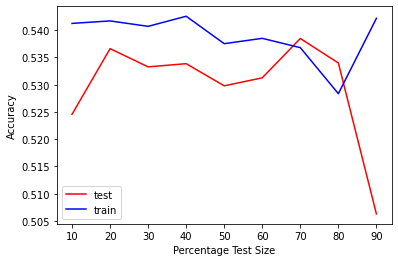

In [64]:
train_acc = []
test_acc = []
t = range(10,100,10)
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1*i, random_state=40)  
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    train_acc.append(LR.score(X_train,y_train))
    test_acc.append(LR.score(X_test,y_test))
plt.plot(t,test_acc,color='r',label='test')
plt.plot(t,train_acc,color='b',label='train')
plt.xlabel("Percentage Test Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Running the Gaussian Naive Bayes Model

In [65]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [66]:
y_predictions_GNB = GNB.predict(X_test)

## Accuracy score of our predicted y fot the Gaussian Niave Byes Model

In [67]:
print (metrics.accuracy_score(y_test, y_predictions_GNB)) 

0.5003900590660871


In [68]:
print(classification_report(y_test,y_predictions_GNB))

              precision    recall  f1-score   support

           0       0.50      0.80      0.61      4433
           1       0.52      0.21      0.30      4540

    accuracy                           0.50      8973
   macro avg       0.51      0.50      0.46      8973
weighted avg       0.51      0.50      0.45      8973



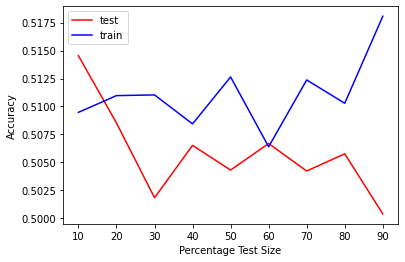

In [69]:
train_acc = []
test_acc = []
t = range(10,100,10)
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1*i, random_state=40)  
    GNGNBB = GaussianNB()
    GNB.fit(X_train,y_train)
    train_acc.append(GNB.score(X_train,y_train))
    test_acc.append(GNB.score(X_test,y_test))
plt.plot(t,test_acc,color='r',label='test')
plt.plot(t,train_acc,color='b',label='train')
plt.xlabel("Percentage Test Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# So the Logstic Regression Model is giving the highest Accuracy Score of 53-54%